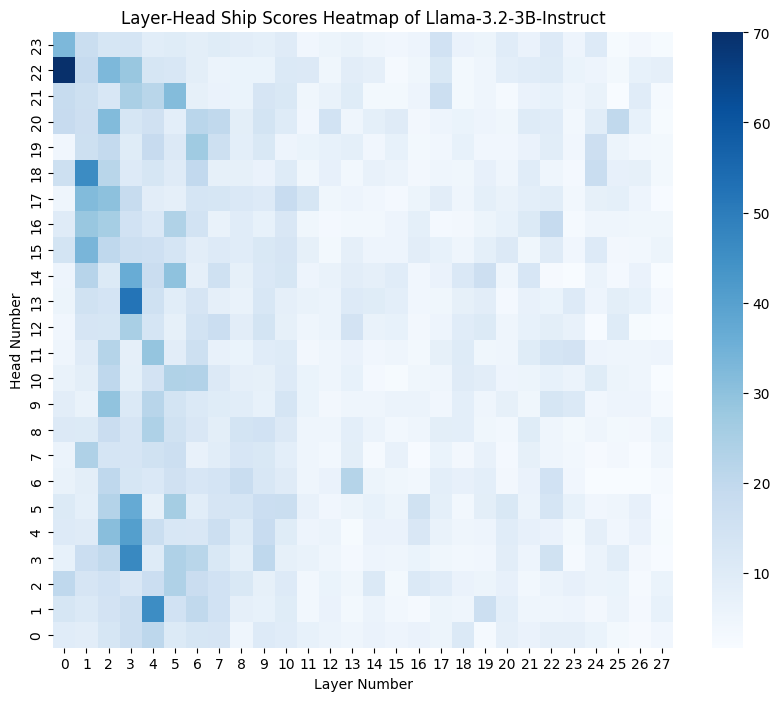

In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_layer_head_heatmap(folder_path):
    for subdir in folder_path:
        with open(file_path, 'r') as f:
            data = json.load(f)
        lang = file_path.strip().split('_')[1]

        layer_head_scores = {}
        max_layer = 0
        max_head = 0

        for key, value in data.items():
            layer, head = map(int, key.split('-'))
            layer_head_scores[(layer, head)] = value
            max_layer = max(max_layer, layer)
            max_head = max(max_head, head)
        score_matrix = np.zeros((max_head + 1, max_layer + 1))

        for (layer, head), score in layer_head_scores.items():
            score_matrix[head, layer] = score
        score_matrix = np.flipud(score_matrix)
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            score_matrix, 
            annot=False, 
            cmap="Blues", 
            xticklabels=[f"{i}" for i in range(max_layer + 1)],
            yticklabels=[f"{i}" for i in range(max_head, -1, -1)]
        )
        plt.xlabel("Layer Number")
        plt.ylabel("Head Number")
        plt.title(f"Layer-Head Ship Scores Heatmap of {model_name}")
        plt.show(f"Layer-Head Ship Scores Heatmap of {model_name},lang = {lang}")
        plt.savefig()
    plot_layer_head_heatmap('./exp_res/sahara/Llama-3.2-3B-Instruct/maliciousinstruct.csv_0.jsonl')


In [5]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_layer_head_heatmap(folder_path):
    """
    Process all JSON files in the specified folder structure, extract layer-head scores,
    and generate heatmaps for each JSON file. Include model folder name in titles and file names.

    Parameters:
    folder_path (str): The path to the folder containing subdirectories with JSON files.
    """
    # Iterate through subdirectories and files
    for root, dirs, files in os.walk(folder_path):
        # Extract model name from the folder structure
        model_name = os.path.basename(root)

        for file in files:
            if file.endswith(".jsonl"):
                file_path = os.path.join(root, file)

                # Read the JSON data
                with open(file_path, 'r') as f:
                    data = json.load(f)

                # Extract language from file name
                lang = file.split('_')[1]

                # Process layer-head scores
                layer_head_scores = {}
                max_layer = 0
                max_head = 0

                for key, value in data.items():
                    layer, head = map(int, key.split('-'))
                    layer_head_scores[(layer, head)] = value
                    max_layer = max(max_layer, layer)
                    max_head = max(max_head, head)

                # Create a matrix to hold scores
                score_matrix = np.zeros((max_head + 1, max_layer + 1))

                for (layer, head), score in layer_head_scores.items():
                    score_matrix[head, layer] = score

                # Flip matrix for better visualization
                score_matrix = np.flipud(score_matrix)

                # Generate heatmap
                plt.figure(figsize=(10, 8))
                sns.heatmap(
                    score_matrix,
                    annot=False,
                    cmap="Blues",
                    xticklabels=[f"{i}" for i in range(max_layer + 1)],
                    yticklabels=[f"{i}" for i in range(max_head, -1, -1)]
                )
                plt.xlabel("Layer Number")
                plt.ylabel("Head Number")
                plt.title(f"Layer-Head Scores Heatmap - {model_name} ({lang})")

                # Save heatmap as an image file
                output_file = f"heatmap_{model_name}_{lang}.png"
                output_path = os.path.join(root, output_file)
                plt.savefig(output_path)
                plt.close()

# Call the function with the path to the directory
plot_layer_head_heatmap('./Result_modified')
plot_layer_head_heatmap('./Result')
plot_layer_head_heatmap('./result of modified bug')


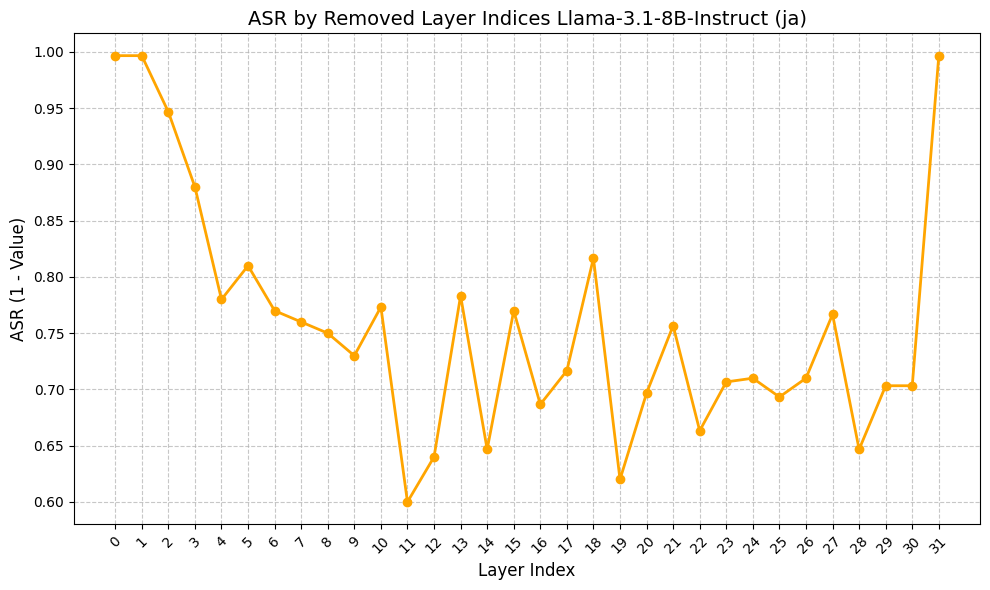

In [11]:

import matplotlib.pyplot as plt

# データを辞書形式で定義
data = {
    0: 0.0033, 1: 0.0033, 2: 0.0533, 3: 0.1200, 4: 0.2200, 5: 0.1900, 6: 0.2300, 7: 0.2400, 8: 0.2500, 9: 0.2700,
    10: 0.2267, 11: 0.4000, 12: 0.3600, 13: 0.2167, 14: 0.3533, 15: 0.2300, 16: 0.3133, 17: 0.2833, 18: 0.1833,
    19: 0.3800, 20: 0.3033, 21: 0.2433, 22: 0.3367, 23: 0.2933, 24: 0.2900, 25: 0.3067, 26: 0.2900, 27: 0.2333,
    28: 0.3533, 29: 0.2967, 30: 0.2967, 31: 0.0033
}

# x軸とy軸のデータ
layers = list(data.keys())
asr_values = list(data.values())

# 攻撃拒否率を計算（1 - ASR）
rejection_rates = [1 - value for value in asr_values]

# グラフを作成
plt.figure(figsize=(10, 6))
plt.plot(layers, rejection_rates, marker='o', linestyle='-', linewidth=2, color='orange')

# グラフのタイトルと軸ラベル
plt.title("ASR by Removed Layer Indices Llama-3.1-8B-Instruct (ja)", fontsize=14)
plt.xlabel("Layer Index", fontsize=12)
plt.ylabel("ASR (1 - Value)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(layers, rotation=45, fontsize=10)
plt.tight_layout()
plt.savefig("./ASR_head_detect/ASR by Removed Layer Indices Llama-3.1-8B-Instruct (ja).png")
# グラフを表示
plt.show()
